
*   Name: Aishwarya Bhavsar
*   CSULB ID: 029371509
*   Multiclass Classification - Newswires Dataset.



In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
#Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[45]

20

In [7]:
#Preparing the data
#Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)            
x_test = vectorize_sequences(test_data)

In [9]:
print(x_train)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [10]:
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [12]:
one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [14]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
print(one_hot_train_labels)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
#Building your network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
#Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.5964 - accuracy: 0.5537 - val_loss: 1.6741 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.3566 - accuracy: 0.7209 - val_loss: 1.2677 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0080 - accuracy: 0.7838 - val_loss: 1.0932 - val_accuracy: 0.7660
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.7979 - accuracy: 0.8261 - val_loss: 1.0019 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6421 - accuracy: 0.8613 - val_loss: 0.9421 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5154 - accuracy: 0.8901 - val_loss: 0.9035 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4158 - accuracy: 0.9116 - val_loss: 0.8873 - val_accuracy: 0.8070
Epoch 8/20
16

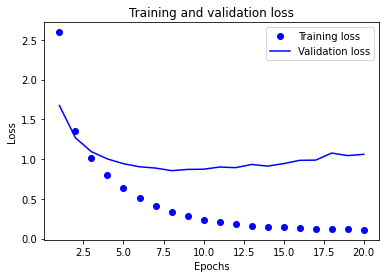

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

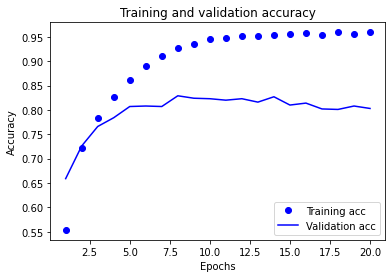

In [27]:
#Plotting the training and validation accuracy
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
#Retraining the model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 2.6165 - accuracy: 0.5269 - val_loss: 1.6897 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.3984 - accuracy: 0.7066 - val_loss: 1.2763 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0289 - accuracy: 0.7786 - val_loss: 1.1056 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 40ms/step - loss: 0.8111 - accuracy: 0.8257 - val_loss: 1.0151 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6504 - accuracy: 0.8623 - val_loss: 0.9415 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5175 - accuracy: 0.8938 - val_loss: 0.9348 - val_accuracy: 0.7930
Epoch 7/9
16/16 [==============================] - 1s 40ms/step - loss: 0.4229 - accuracy: 0.9117 - val_loss: 0.8840 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [30]:
results

[1.0025769472122192, 0.7916295528411865]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)

In [33]:
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [34]:
#Generating predictions on new data
predictions = model.predict(x_test)

In [35]:
predictions[0].shape        #Each entry in predictions is a vector of length 46

(46,)

In [36]:
np.sum(predictions[0])      #The coefficients in this vector sum to 1

1.0

In [37]:
np.argmax(predictions[0])    #The largest entry is the predicted class—the class with the highest probability

3

In [38]:
#Casting labels as integer tensors
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [39]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [40]:
#A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9847 - accuracy: 0.2177 - val_loss: 2.2532 - val_accuracy: 0.5780
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7968 - accuracy: 0.5760 - val_loss: 1.6113 - val_accuracy: 0.5700
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.4365 - accuracy: 0.6114 - val_loss: 1.5136 - val_accuracy: 0.6220
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2834 - accuracy: 0.6885 - val_loss: 1.4378 - val_accuracy: 0.6590
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1758 - accuracy: 0.7087 - val_loss: 1.3884 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0885 - accuracy: 0.7239 - val_loss: 1.3923 - val_accuracy: 0.6870
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0183 - accuracy: 0.7352 - val_loss: 1.3911 - val_accuracy: 0.6770
Epoch 8/20
63